In [1]:
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [2]:
from scipy.constants import eV, m_e

This notebook explores the paper "Probabilistic model for the simulation of secondary electron emission" from M. A. Furman and M. T. F. Pivi. Phys. Rev. ST Accel. Beams 5, 124404 – Published 31 December 2002; Erratum Phys. Rev. ST Accel. Beams 16, 069901 (2013).
The paper is available here: http://journals.aps.org/prstab/pdf/10.1103/PhysRevSTAB.5.124404

#Test dataset
In order to test the model, we use data from the Joy database. Below are data taken for copper. http://web.utk.edu/~srcutk/database.doc

In [3]:
E_Cu_3, SEY_Cu_3 = np.loadtxt('data/Joy_SEY_copper_dataset3.txt', skiprows=2, unpack=True)
E_Cu_4, SEY_Cu_4 = np.loadtxt('data/Joy_SEY_copper_dataset4.txt', skiprows=2, unpack=True)
E_Cu_6, SEY_Cu_6 = np.loadtxt('data/Joy_SEY_copper_dataset6.txt', skiprows=2, unpack=True)

E_Cu_11, SEY_Cu_11 = np.loadtxt('data/Joy_SEY_copper_dataset11.txt', skiprows=2, unpack=True)
E_Cu_13, SEY_Cu_13 = np.loadtxt('data/Joy_SEY_copper_dataset13.txt', skiprows=2, unpack=True)

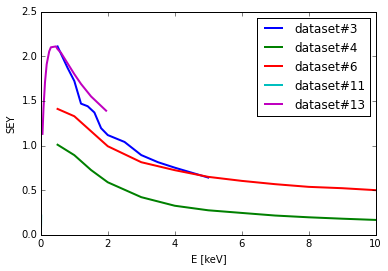

In [4]:
plot(E_Cu_3, SEY_Cu_3, E_Cu_4, SEY_Cu_4, E_Cu_6, SEY_Cu_6, lw=2)
plot(E_Cu_11, SEY_Cu_11, E_Cu_13, SEY_Cu_13, lw=2)
legend(('dataset#3','dataset#4','dataset#6','dataset#11','dataset#13'))
xlabel('E [keV]')
ylabel('SEY')


#Backscattered electrons

The experimental data suggest that the SEY for backscattered electrons has the following form: 
$$
\delta_e(E_0, \theta_0=0)
=
P_{1,e}(\infty) + \left[\hat{P}_{1,e} - P_{1,e}(\infty) \right] e^{-\left(|E_0 - \hat{E}_e|/W \right)^p/p} 
$$


In [23]:
def delta_e(E_0, E_e, P_1e_inf, P_1e_max, W, p):
    return P_1e_inf \
        + (P_1e_max - P_1e_inf)*exp(-(abs(E_0 - E_e)/W)**p / p)

(0, 1.7)

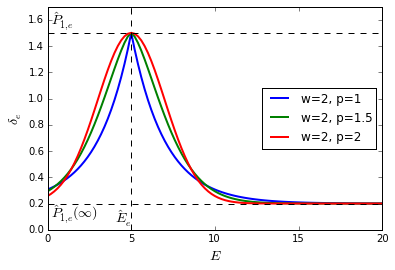

In [6]:
E = linspace(0, 20, 101)

E_e = 5
P_1e_inf = 0.2
P_1e_max = 1.5
w = 2
p = 1.5

plot(E, delta_e(E, E_e, P_1e_inf, P_1e_max, w, 1), lw=2)
plot(E, delta_e(E, E_e, P_1e_inf, P_1e_max, w, 1.5), lw=2)
plot(E, delta_e(E, E_e, P_1e_inf, P_1e_max, w, 2), lw=2)

axvline(x = E_e, color='k', ls='--')
text(E_e, 0.05, '$\hat{E}_e$', horizontalalignment='right', fontsize=14)
axhline(y=P_1e_max, color='k', ls='--')
text(0.2, P_1e_max, '$\hat{P}_{1,e}$', verticalalignment='bottom', fontsize=14)
axhline(y=P_1e_inf, color='k', ls='--')
text(0.2, P_1e_inf, '$\hat{P}_{1,e}(\infty)$', verticalalignment='top', fontsize=14)

legend(('w=2, p=1', 'w=2, p=1.5', 'w=2, p=2'), loc='best')
ylabel('$\delta_e$', fontsize=14)
xlabel('$E$', fontsize=14)
ylim(0, 1.7)

#Rediffused electrons
A form for $\delta_r$ might be given by:
$$
\delta_r(E_0. \theta_0=0)
=
P_{1,r}(\infty) 
\left[
1 - e^{-\left( E_0/E_r \right)^r}
\right]
$$

In [7]:
def delta_r(E_0, E_r, P_1r_inf, r):
    return P_1r_inf * (1 - exp(-(E_0/E_r)**r))

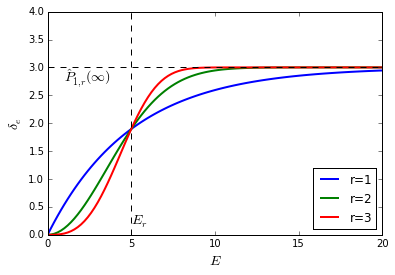

In [8]:
E_r = 5
P_1r_inf = 3

plot(E, delta_r(E, E_r, P_1r_inf, 1), lw=2)
plot(E, delta_r(E, E_r, P_1r_inf, 2), lw=2)
plot(E, delta_r(E, E_r, P_1r_inf, 3), lw=2)

ylim(0, 4)
axvline(x=E_r, color='k', ls='--')
text(E_r, 0.4, '$E_r$', verticalalignment='top', fontsize=14)
axhline(y=P_1r_inf, color='k', ls='--')
text(1, P_1r_inf, '$\hat{P}_{1,r}(\infty)$', verticalalignment='top', fontsize=14)

legend(('r=1', 'r=2', 'r=3'), loc='best')
ylabel('$\delta_e$', fontsize=14)
xlabel('$E$', fontsize=14)


#True-secondary electrons
The energy and angular dependence of $\delta_{ts}$ are well fit by:
$$
\delta_{ts} (E_0. \theta_0)
=
\hat{\delta}(\theta_0) 
D\left[
\frac{E_0}{\hat{E}(\theta_0)}
\right]
$$
with
$$
D(x) = \frac{s x}{s - 1 + x^s}
$$

In [9]:
def D(x, s):
    return s*x/(s - 1 + x**s)

def delta_ts(E_0, E_max, delta_max, s):
    return delta_max * D(E_0/E_max, s)

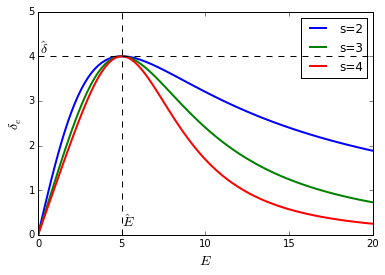

In [10]:
E_max = 5
delta_max = 4

plot(E, delta_ts(E, E_max, delta_max, 2), lw=2)
plot(E, delta_ts(E, E_max, delta_max, 3), lw=2)
plot(E, delta_ts(E, E_max, delta_max, 4), lw=2)

ylim(0, 5)
axhline(y=delta_max, color= 'k', ls= '--')
text(0.1, delta_max, '$\hat{\delta}$', verticalalignment='bottom', fontsize=14)

axvline(x=E_max, color= 'k', ls= '--')
text(E_max, 0.5, '$\hat{E}$', verticalalignment='top', fontsize=14)


legend(('s=2', 's=3', 's=4'), loc='best')
ylabel('$\delta_e$', fontsize=14)
xlabel('$E$', fontsize=14)

#Fitting an experimental curve to a model
In this section we want to fit an experimental dataset with one of the mathematical model given previously. The result of this routine is the best fitting parameters.

$\hat{\delta}$ and $\hat{E}$ are initially determined directly from the dataset, as the maximum SEY and the energy location. The fitting algorythm then optimize all the parameters to get the best fit.

In [15]:
from scipy.optimize import curve_fit

In [18]:
def fit_ts(E_exp, delta_exp):
    '''
    Fit experimental SEY points with the true-secondary *only* model.
    '''
    s0 = 2
    delta_max = max(delta_exp)
    E_max = E_exp[argmax(delta_exp)] 
    print('Max SEY={} for E={} keV'.format(delta_max, E_max))
    popt,pcov=curve_fit(delta_ts, E_exp, delta_exp, [E_max, delta_max, s0])
    return popt

Max SEY=2.11 for E=0.45 keV
[ 0.31983225  2.11672922  1.35811197]


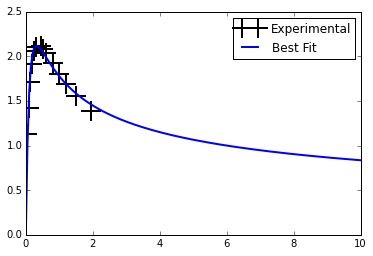

In [17]:
E_exp = E_Cu_13
delta_exp = SEY_Cu_13

popt = fit_ts(E_exp, delta_exp)
print(popt)

E = linspace(0,10, 201)
plot(E_exp, delta_exp, '+k', lw=2, ms=20, markeredgewidth=2)
plot(E, delta_ts(E, *popt), lw=2)
legend(('Experimental', 'Best Fit'))


The code below fit the experimental SEY combining all the three contributions. But the code doesn't check the validity of the parameters which are found.

In [24]:
def delta_all(E_0, E_e, P_1e_inf, P_1e_max, w, p, E_r, P_1r_inf, r, E_max, delta_max, s):
    _delta_e = delta_e(E_0, E_e, P_1e_inf, P_1e_max, w, p)
    _delta_r = delta_r(E_0, E_r, P_1r_inf, r)
    _delta_ts = delta_ts(E_0, E_max, delta_max, s)
    delta_all = _delta_e + _delta_r + _delta_ts
    return delta_all

def fit_all(E_exp, delta_exp):
    '''
    Fit experimental SEY points.
    '''
    # initial parameters
    # backscattered parameters
    E_e = 0
    P_1e_inf = 0.02
    P_1e_max = 0.5
    w = 2
    p = 1
    
    # rediffused parameters
    E_r = 0.04
    P_1r_inf = 0.2 
    r = 0.1
    
    # true-secondary parameters
    delta_max = max(delta_exp)
    E_max = E_exp[argmax(delta_exp)]
    s = 2
    
    params = [E_e, P_1e_inf, P_1e_max, w, p, E_r, P_1r_inf, r, E_max, delta_max, s]
    
    popt,pcov=curve_fit(delta_all, E_exp, delta_exp, params)

    return popt

/usr/lib/python2.7/site-packages/IPython/kernel/__main__.py:2: RuntimeWarning: overflow encountered in power
  from IPython.kernel.zmq import kernelapp as app
/usr/lib/python2.7/site-packages/IPython/kernel/__main__.py:2: RuntimeWarning: overflow encountered in exp
  from IPython.kernel.zmq import kernelapp as app
/usr/lib/python2.7/site-packages/IPython/kernel/__main__.py:2: RuntimeWarning: invalid value encountered in power
  from IPython.kernel.zmq import kernelapp as app
/usr/lib/python2.7/site-packages/IPython/kernel/__main__.py:2: RuntimeWarning: divide by zero encountered in power
  from IPython.kernel.zmq import kernelapp as app


[  6.66336594e-02  -1.95556423e-01   4.94781199e-01   2.03432744e+00
   8.46854600e-01   2.98587550e-14   1.57919993e-01  -4.34300158e-01
   4.50070894e-01   1.78399180e+00   1.36836794e+00]


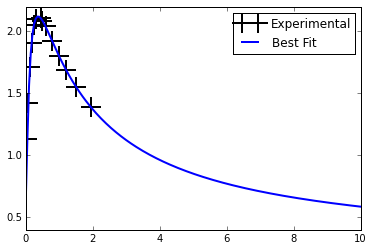

In [29]:
E_exp = E_Cu_13
delta_exp = SEY_Cu_13

popt = fit_all(E_exp, delta_exp)
print(popt)

E = linspace(0,10, 201)
plot(E_exp, delta_exp, '+k', lw=2, ms=20, markeredgewidth=2)
plot(E, delta_all(E, *popt), lw=2)
legend(('Experimental', 'Best Fit'))

The code below, inspired from:
http://stackoverflow.com/questions/16760788/python-curve-fit-library-that-allows-me-to-assign-bounds-to-parameters
bounds the parameters.